In [1]:
#importing libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  f1_score, precision_score,recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data collection and Processing

In [29]:
# Loading the dataset
df= pd.read_csv('/content/drive/My Drive/audit_risk.csv')

#printing first 5 rows of the data
df.head()


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:

# Getting the informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [6]:
# check the number of rows and columns
df.shape

(776, 27)

In [7]:
#printing last 5 rows of the data
df.tail()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0
775,55.57,15,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.4,0,0.2,0.0,2.0,1.464,0.4,0.5,0.2928,0


In [8]:
# to check the number of missing values in each columns
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [30]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.216824,-0.425198,-0.219025,-0.132670,-0.218967,-0.130589,-0.153316,-0.151840,-0.170404,...,-0.128546,-0.114798,-0.136900,-0.103223,-0.337326,-0.173278,-0.154950,NaN,-0.091954,-0.394131
PARA_A,-0.216824,1.000000,0.496680,0.999267,0.161940,0.358550,0.161834,0.267042,0.133786,0.140648,...,0.118941,0.118279,0.172635,0.103981,0.426659,0.481859,0.149198,NaN,0.219759,0.378758
Score_A,-0.425198,0.496680,1.000000,0.504878,0.249438,0.572655,0.248188,0.297547,0.242692,0.274594,...,0.102677,0.177932,0.265322,0.150925,0.720488,0.320920,0.170872,NaN,0.201847,0.619726
Risk_A,-0.219025,0.999267,0.504878,1.000000,0.165287,0.362971,0.165143,0.270223,0.135613,0.143103,...,0.118641,0.121132,0.176159,0.106561,0.432505,0.483291,0.150778,NaN,0.221581,0.385067
PARA_B,-0.132670,0.161940,0.249438,0.165287,1.000000,0.347568,0.999936,0.994100,0.209855,0.230851,...,0.079393,0.203582,0.316541,0.196048,0.397155,0.654453,0.186709,NaN,0.887794,0.257029
Score_B,-0.218967,0.358550,0.572655,0.362971,0.347568,1.000000,0.348152,0.379336,0.277576,0.313798,...,0.015324,0.200841,0.309505,0.171271,0.901276,0.365662,0.127827,NaN,0.207975,0.635768
Risk_B,-0.130589,0.161834,0.248188,0.165143,0.999936,0.348152,1.000000,0.994023,0.209596,0.230547,...,0.079731,0.202823,0.316375,0.195292,0.396947,0.654505,0.186409,NaN,0.887570,0.255286
TOTAL,-0.153316,0.267042,0.297547,0.270223,0.994100,0.379336,0.994023,1.000000,0.217641,0.238237,...,0.089204,0.210752,0.326396,0.202159,0.433828,0.689772,0.197319,NaN,0.888096,0.292022
numbers,-0.151840,0.133786,0.242692,0.135613,0.209855,0.277576,0.209596,0.217641,1.000000,0.908140,...,0.136956,0.202327,0.209598,0.202385,0.502827,0.271115,0.228657,NaN,0.221461,0.308141
Score_B.1,-0.170404,0.140648,0.274594,0.143103,0.230851,0.313798,0.230547,0.238237,0.908140,1.000000,...,0.157595,0.226177,0.248423,0.223343,0.565976,0.308543,0.256551,NaN,0.259737,0.353803


In [32]:
df.skew()

<ipython-input-32-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Sector_score       0.769987
PARA_A             8.505663
Score_A            0.492813
Risk_A             8.356859
PARA_B            20.538288
Score_B            0.960477
Risk_B            20.506060
TOTAL             19.261745
numbers            6.742206
Score_B.1          3.555230
Risk_C             3.995796
Money_Value       10.529463
Score_MV           1.297880
Risk_D            10.526293
District_Loss      2.231033
PROB               6.560046
RiSk_E             3.011444
History            9.275458
Prob               4.348489
Risk_F            10.391711
Score              1.055717
Inherent_Risk      9.170031
CONTROL_RISK       5.158719
Detection_Risk     0.000000
Audit_Risk        20.108965
Risk               0.438822
dtype: float64

In [9]:
 #replacing the missing values in Money_Value column with mean value
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)

In [10]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [45]:
df['Risk'].value_counts()

0    471
1    305
Name: Risk, dtype: int64

In [46]:
df['Risk_A'].value_counts()

0.000    151
0.102      8
0.098      8
0.112      7
0.168      7
        ... 
0.524      1
0.564      1
5.982      1
2.178      1
0.072      1
Name: Risk_A, Length: 363, dtype: int64

In [47]:
df['Risk_B'].value_counts()

0.000     279
0.056       7
0.022       7
0.010       6
0.126       5
         ... 
15.444      1
19.626      1
14.622      1
52.626      1
0.090       1
Name: Risk_B, Length: 360, dtype: int64

<Axes: >

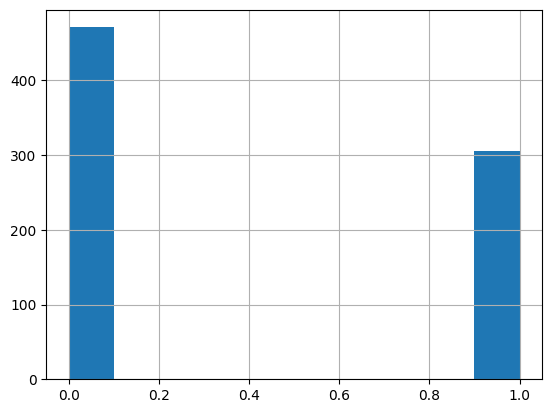

In [33]:
df.Risk.hist()

<Axes: >

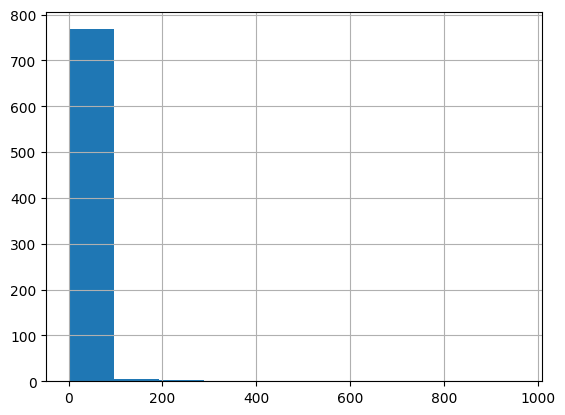

In [34]:
df.Audit_Risk.hist()

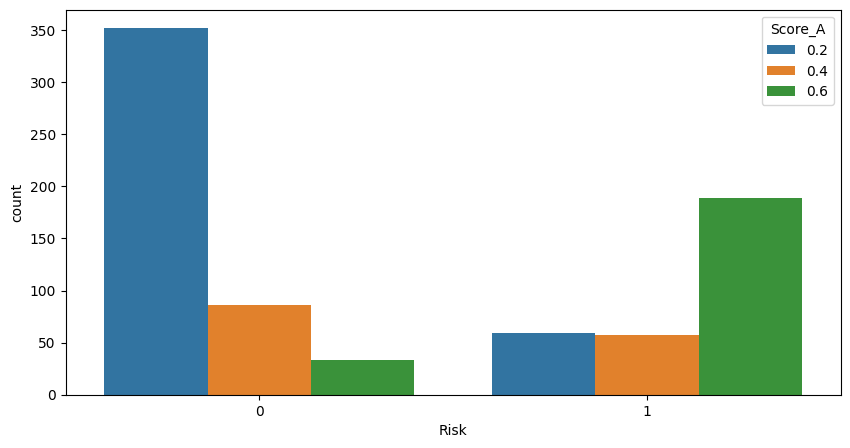

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Risk", data=df, hue = "Score_A") 
plt.show()

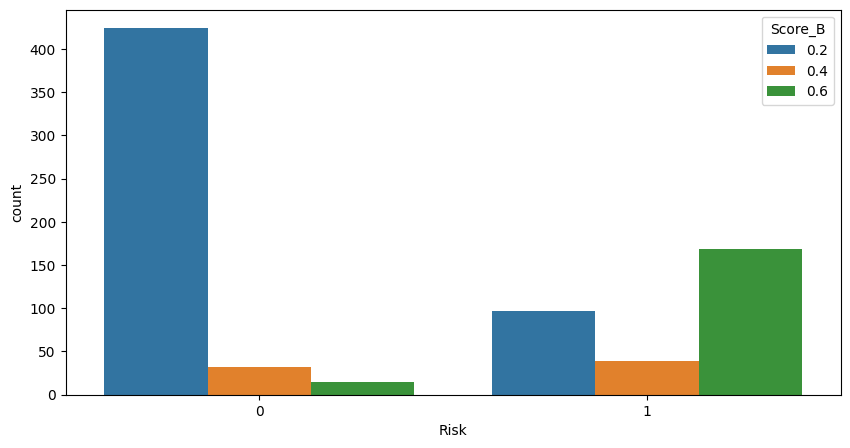

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Risk", data=df, hue = "Score_B") 
plt.show()

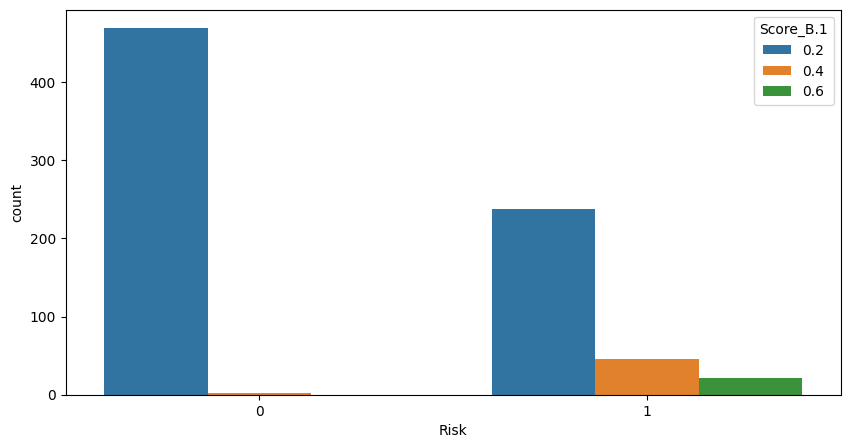

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Risk", data=df, hue = "Score_B.1") 
plt.show()

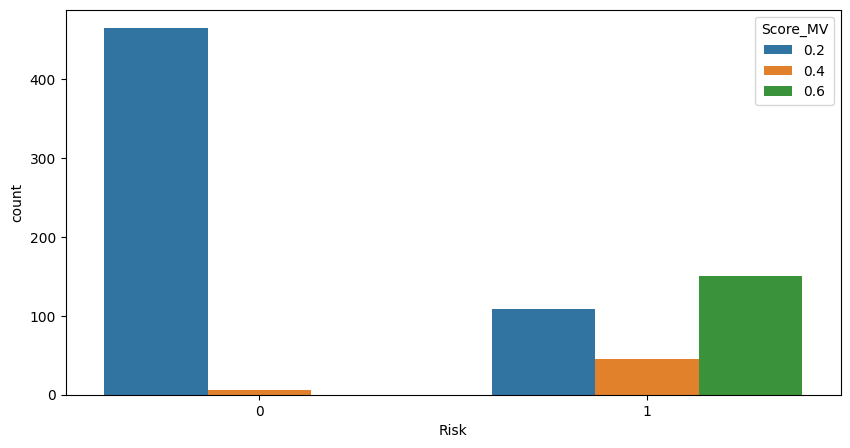

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Risk", data=df, hue = "Score_MV") 
plt.show()

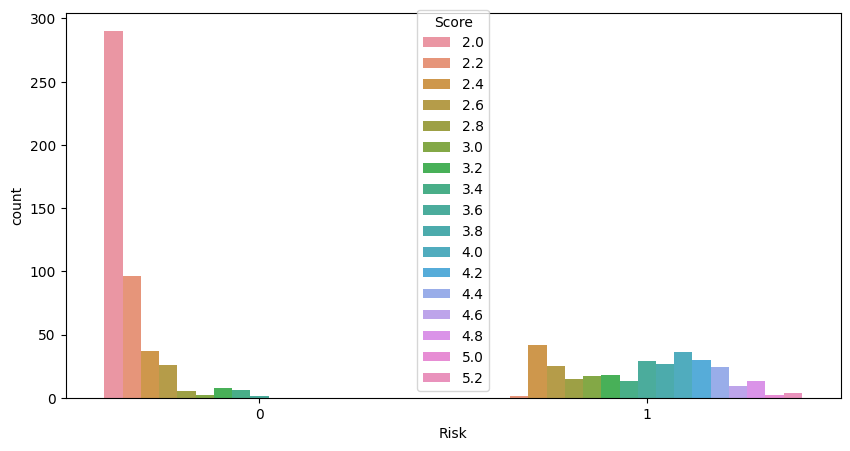

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Risk", data=df, hue = "Score") 
plt.show()

**Data Visualization**

I am deleting TOTAL and LOCATION_ID as these are not significant for prediction process

In [11]:
delete =['LOCATION_ID','TOTAL']

df.drop(delete, axis=1, inplace=True)

In [12]:
df.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


**Seperating Features and Target**

<Axes: ylabel='count'>

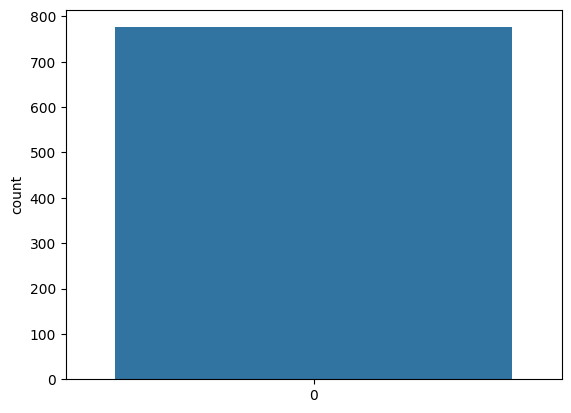

In [13]:
sns.countplot(df['Risk'], label = "Count")

In [14]:
x=df.drop('Risk',axis='columns')
y=df['Risk']

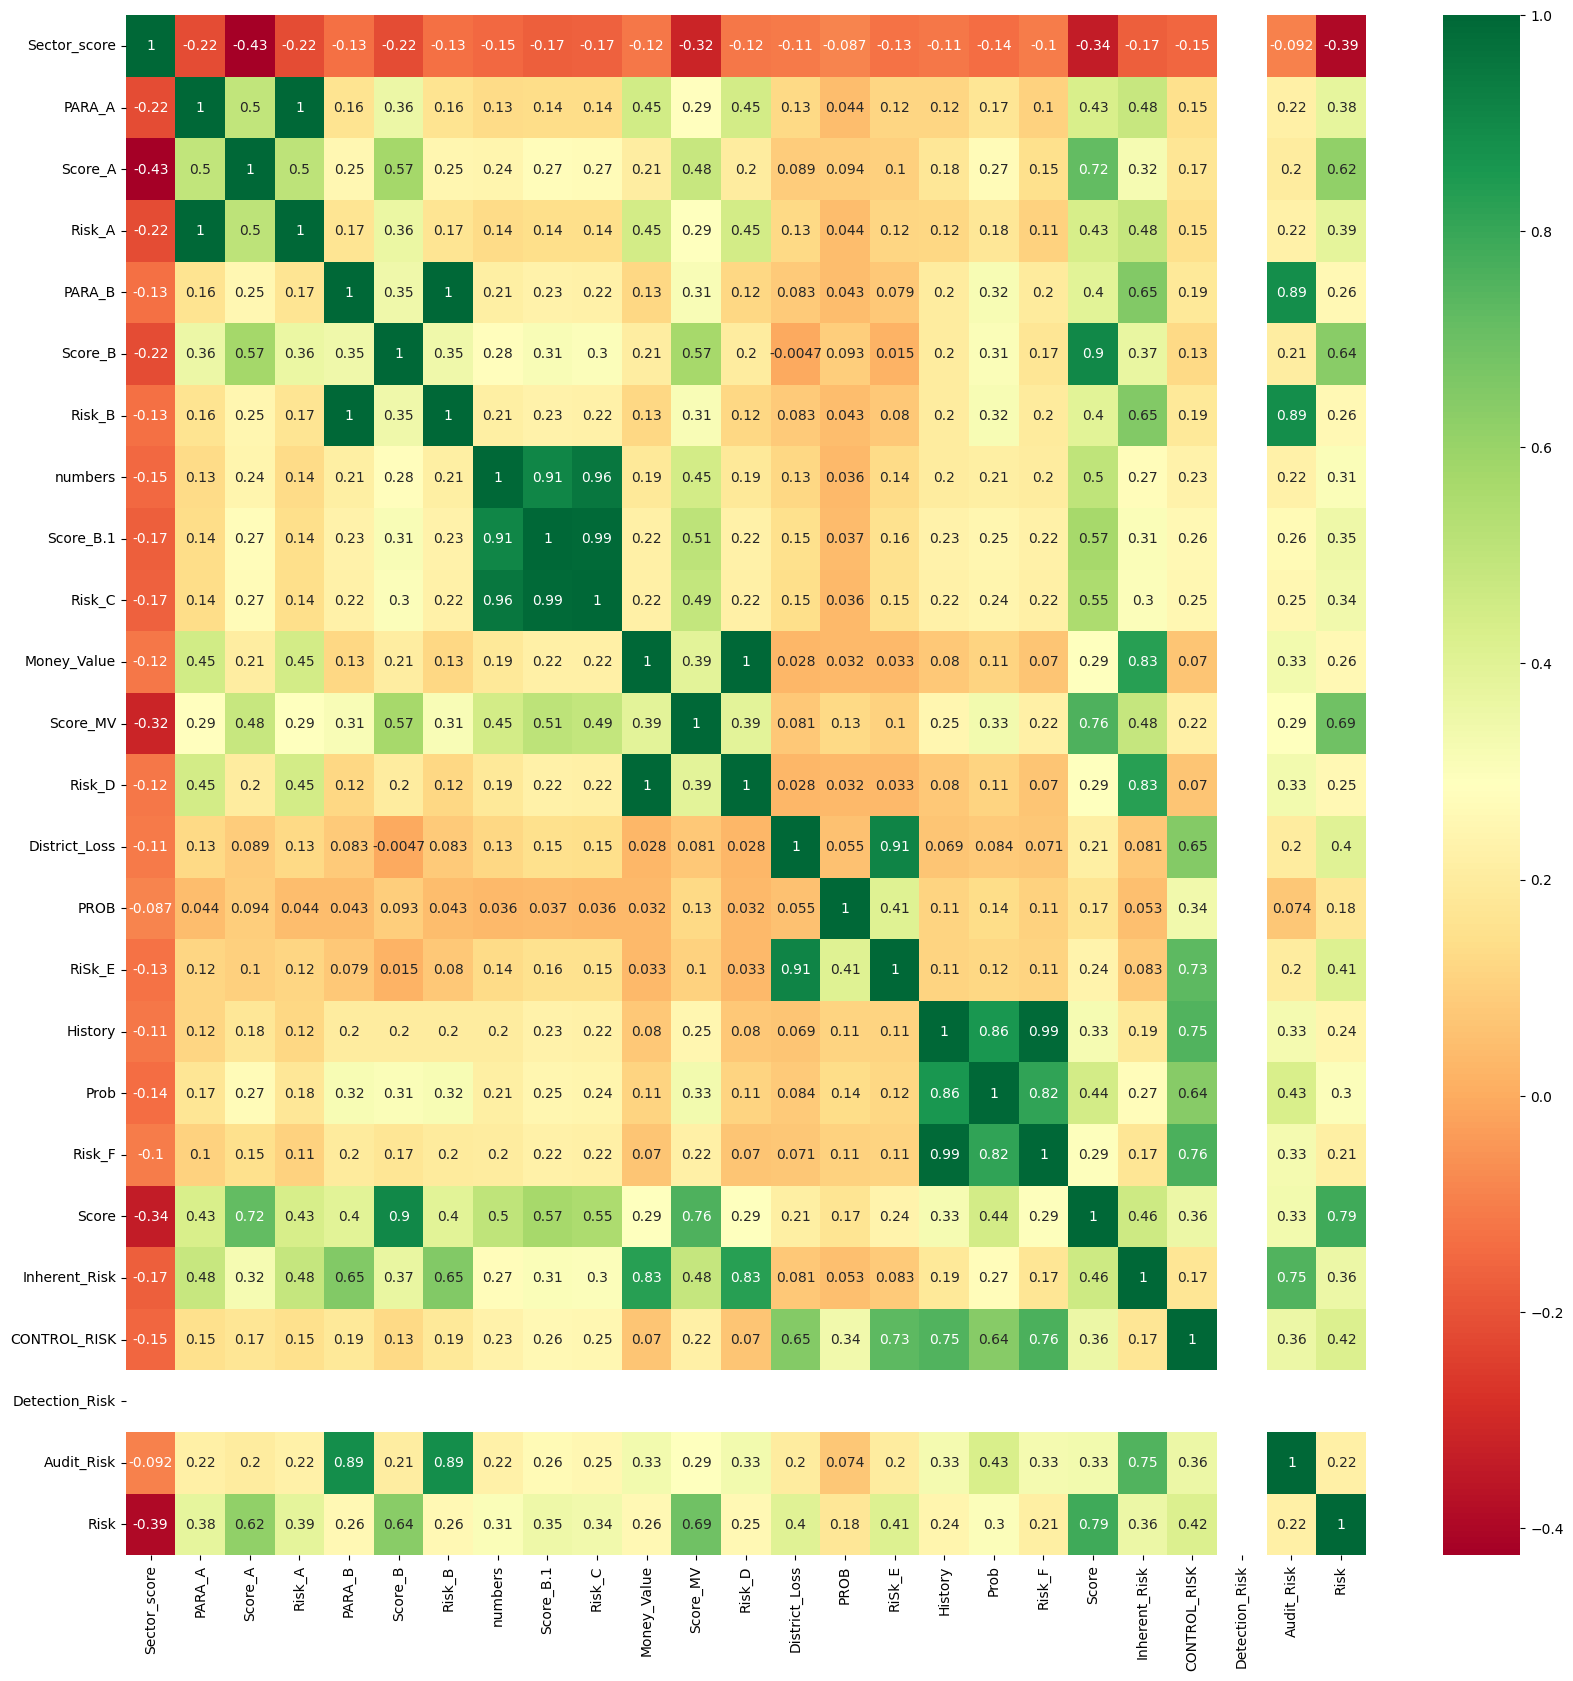

In [15]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

As we have seen there is no correlation of Detection_Risk so it will be deleted before model building process as it is not contributing well enough for prediction process.

In [16]:
x=x.drop(['Detection_Risk'],axis=1)


In [17]:
x.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk'],
      dtype='object')

### **Splitting the data**

In [18]:
x_train,x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, stratify=y,random_state=2)

## Model Training


Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_scaled = pd.DataFrame(sc_x.fit_transform(x_train))
x_test_scaled = pd.DataFrame(sc_x.transform(x_test))

### Logistics Regression

In [20]:
logi = LogisticRegression(random_state = 0)
logi.fit(x_train_scaled, y_train)


LogisticRegression(random_state=0)

### Cross Validation

In [21]:
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = x_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9774193548387098

## Model Evaluation

In [22]:
y_predict_logi = logi.predict(x_test_scaled)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.99359,0.977419,1.0,0.983607,0.991736,0.991803


In [23]:
print(confusion_matrix(y_test, y_predict_logi))
print(classification_report(y_test, y_predict_logi))

[[95  0]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        61

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



## **Random Forest**

In [25]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(x_train_scaled, y_train)
y_predict_r = random_forest_e.predict(x_test_scaled)

## Cross Validation

In [26]:
acc_ran = cross_val_score(estimator = random_forest_e, X = x_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_ran.mean()

0.9983870967741936

## Model evaluation

In [27]:
y_predict_r = random_forest_e.predict(x_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_ran.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 score','ROC'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-27-5bbcfc22d664>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC,F1 score
0,Logistic Regression,0.99359,0.977419,1.0,0.983607,0.991736,0.991803,NaN
1,Random Forest,1.00000,0.998387,1.0,1.000000,NaN,1.000000,1.0


In [55]:
print(confusion_matrix(y_test, y_predict_r))
print(classification_report(y_test, y_predict_r))

[[95  0]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.98      0.99        61

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# **GradientBoost**

In [49]:
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(x_train_scaled, y_train)
y_predict_r = GradientBoosting.predict(x_test_scaled)

In [50]:
acc_ran = cross_val_score(estimator = GradientBoosting, X = x_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_ran.mean()

1.0

In [51]:
y_predict_r = GradientBoosting.predict(x_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['GradientBoosting',acc, acc_ran.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 score','ROC'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-51-b3eb14890776>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC,F1 score
0,Logistic Regression,0.99359,0.977419,1.0,0.983607,0.991736,0.991803,NaN
1,Random Forest,1.00000,0.998387,1.0,1.000000,NaN,1.000000,1.0
2,GradientBoosting,1.00000,1.000000,1.0,1.000000,NaN,1.000000,1.0


# **Support vector machine**

In [52]:
SVC = SVC()
SVC.fit(x_train_scaled, y_train)
y_predict_r = SVC.predict(x_test_scaled)

In [53]:
acc_ran = cross_val_score(estimator = SVC, X = x_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_ran.mean()

0.967741935483871

In [54]:
y_predict_r = SVC.predict(x_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Support vector classifier',acc, acc_ran.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 score','ROC'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-54-039b5858244f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC,F1 score
0,Logistic Regression,0.99359,0.977419,1.0,0.983607,0.991736,0.991803,NaN
1,Random Forest,1.00000,0.998387,1.0,1.000000,NaN,1.000000,1.000000
2,GradientBoosting,1.00000,1.000000,1.0,1.000000,NaN,1.000000,1.000000
3,Support vector classifier,0.99359,0.967742,1.0,0.983607,NaN,0.991803,0.991736


# **GaussianNB classifier**

In [56]:
GaussianNB = GaussianNB()
GaussianNB.fit(x_train_scaled, y_train)
y_predict_GaussianNB = GaussianNB.predict(x_test_scaled)

In [57]:
acc_ran = cross_val_score(estimator = GaussianNB, X = x_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_ran.mean()

0.9725806451612904

In [58]:
y_predict_GaussianNB = GaussianNB.predict(x_test_scaled)
roc=roc_auc_score(y_test, y_predict_GaussianNB)
acc = accuracy_score(y_test, y_predict_GaussianNB)
prec = precision_score(y_test, y_predict_GaussianNB)
rec = recall_score(y_test, y_predict_GaussianNB)
f1 = f1_score(y_test, y_predict_GaussianNB)

model_results = pd.DataFrame([['GaussianNB classifier',acc, acc_ran.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 score','ROC'])
results = results.append(model_results, ignore_index = True)
results

<ipython-input-58-159d3beac8ec>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC,F1 score
0,Logistic Regression,0.993590,0.977419,1.000000,0.983607,0.991736,0.991803,NaN
1,Random Forest,1.000000,0.998387,1.000000,1.000000,NaN,1.000000,1.000000
2,GradientBoosting,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000
3,Support vector classifier,0.993590,0.967742,1.000000,0.983607,NaN,0.991803,0.991736
4,GaussianNB classifier,0.987179,0.972581,0.968254,1.000000,NaN,0.989474,0.983871
